In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


def create_heatmap_mask(heatmap_path, threshold):
    """
    Creates a binary mask from a heatmap image using a specified threshold.

    Args:
        heatmap_path (str): Path to the heatmap image
        threshold (float): Threshold value between 0 and 1 for masking

    Returns:
        numpy.ndarray: Binary mask (0 for warmer areas, 1 for cooler areas)
    """
    # Load the heatmap
    heatmap = plt.imread(heatmap_path)

    # If heatmap is RGB (from 'jet_r' colormap), convert to intensity
    if len(heatmap.shape) == 3:
        # Get the 'jet_r' colormap
        jet_r = cm.get_cmap('jet_r')
        
        # Normalize RGB values to [0, 1] if not already
        heatmap_rgb = heatmap[:, :, :3]  # Ignore alpha channel if present
        
        # Initialize intensity array
        intensity = np.zeros(heatmap.shape[:2])
        
        # Compare each pixel to colormap values
        colormap_values = jet_r(np.linspace(0, 1, 256))[:, :3]  # RGB values of colormap
        for i in range(heatmap.shape[0]):
            for j in range(heatmap.shape[1]):
                # Find closest colormap value to the pixel's RGB
                pixel_rgb = heatmap_rgb[i, j]
                distances = np.sum((colormap_values - pixel_rgb) ** 2, axis=1)
                closest_idx = np.argmin(distances)
                # Map to intensity (0 to 1)
                intensity[i, j] = closest_idx / 255.0
        
        heatmap = intensity
    else:
        # Assume single-channel heatmap (grayscale/intensity)
        heatmap = heatmap / np.max(heatmap)

    # Ensure heatmap is normalized to [0, 1]
    heatmap = heatmap / np.max(heatmap)

    # Create binary mask: warmer areas (above threshold) = 0, cooler areas (below) = 1
    mask = np.where(heatmap > threshold, 0, 1)

    return mask

C:\Users\snavi\AppData\Local\Temp\ipykernel_23620\3927195226.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  jet_r = cm.get_cmap('jet_r')


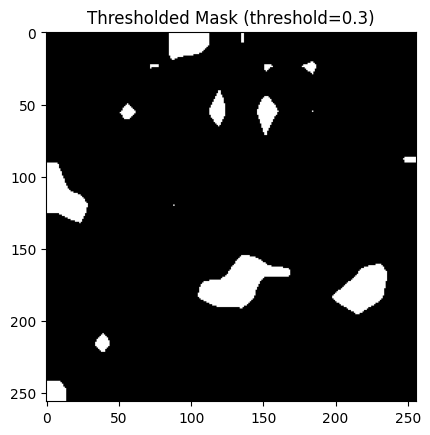

In [2]:
folder_name = f"dd/S3/Mask Images Meta/"
image_name=f"fake_image_10_map"
ext = f".png"

threshold = 0.3
image_path = f"{folder_name}{image_name}{ext}"
mask = create_heatmap_mask(image_path, threshold)
plt.imshow(mask, cmap='gray')
plt.title(f"Thresholded Mask (threshold={threshold})")
plt.show()

In [3]:
mask_path = f"{folder_name}{image_name}_gcam{ext}"
plt.imsave(mask_path, mask, cmap='gray')

In [4]:
import json
import matplotlib.pyplot as plt


folder_name = f"dd/S3/Mask Images Meta/"
image_name=f"fake_image_1_gt"

# Path to the JSON file
json_path = f"{folder_name}{image_name}.json" 

# Load JSON file
with open(json_path, 'r') as f:
    data = json.load(f)

# Convert to NumPy array
bw_image = np.array(data["mask"], dtype=np.uint8)
plt.imsave(f"{folder_name}{image_name}.png", bw_image, cmap='gray')




In [5]:
import json
import matplotlib.pyplot as plt
import numpy as np  # Make sure this is imported!

folder_name = "dd/S3/Mask Images Meta/"

# Iterate from 0 to 10
for i in range(1, 11):
    image_name = f"fake_image_{i}_gt"
    json_path = f"{folder_name}{image_name}.json"
    
    # Load JSON file
    with open(json_path, 'r') as f:
        data = json.load(f)
    
    # Convert to NumPy array
    bw_image = np.array(data["mask"], dtype=np.uint8)

    # Save image
    output_path = f"{folder_name}{image_name}.png"
    plt.imsave(output_path, bw_image, cmap='gray')
